## Data Extraction

In [ ]:
## kaggle key importing
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hassan06/nslkdd

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
 94% 13.0M/13.9M [00:01<00:00, 16.9MB/s]
100% 13.9M/13.9M [00:01<00:00, 10.3MB/s]


In [ ]:
!mkdir dataset
!unzip '/content/nslkdd.zip' -d dataset

Archive:  /content/nslkdd.zip
  inflating: dataset/KDDTest+.arff   
  inflating: dataset/KDDTest+.txt    
  inflating: dataset/KDDTest-21.arff  
  inflating: dataset/KDDTest-21.txt  
  inflating: dataset/KDDTest1.jpg    
  inflating: dataset/KDDTrain+.arff  
  inflating: dataset/KDDTrain+.txt   
  inflating: dataset/KDDTrain+_20Percent.arff  
  inflating: dataset/KDDTrain+_20Percent.txt  
  inflating: dataset/KDDTrain1.jpg   
  inflating: dataset/index.html      
  inflating: dataset/nsl-kdd/KDDTest+.arff  
  inflating: dataset/nsl-kdd/KDDTest+.txt  
  inflating: dataset/nsl-kdd/KDDTest-21.arff  
  inflating: dataset/nsl-kdd/KDDTest-21.txt  
  inflating: dataset/nsl-kdd/KDDTest1.jpg  
  inflating: dataset/nsl-kdd/KDDTrain+.arff  
  inflating: dataset/nsl-kdd/KDDTrain+.txt  
  inflating: dataset/nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: dataset/nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: dataset/nsl-kdd/KDDTrain1.jpg  
  inflating: dataset/nsl-kdd/index.html  


In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import regularizers

import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.neural_network import MLPClassifier

In [ ]:
train_data = pd.read_csv('/content/dataset/KDDTrain+.txt')
test_data = pd.read_csv('/content/dataset/KDDTest+.txt')

## Explore Data

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
            'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
            'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
            'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
train_data.columns = columns
test_data.columns = columns

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
test_data.to_csv('test.csv', index=False)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
train_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
train_data.shape

(125972, 43)

In [ ]:
test_data.shape

(22543, 43)

In [ ]:
columns_with_missing_values = train_data.columns[train_data.isnull().any()].tolist()

if columns_with_missing_values:
    for col in columns_with_missing_values:
        print(f"missing col: {col}")
else:
    print("No missing value")

No missing value


In [ ]:
test_data.duplicated().sum()

0

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
train_data['level'].unique()

array([15, 19, 21, 18, 20, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4])

In [ ]:
for col in train_data.select_dtypes(include=['object']).columns:
  print(f"{col}: {train_data[col].nunique()}")

protocol_type: 3
service: 70
flag: 11
outcome: 23


In [ ]:
for col in test_data.select_dtypes(include=['object']).columns:
  print(f"{col}: {test_data[col].nunique()}")

protocol_type: 3
service: 64
flag: 11
outcome: 38


There are a different number of unique values in the 'service' column in the train and test datasets. Since this discrepancy may cause issues during model training, the columns in the training set will be adjusted to match those in the test set.

Outliers

In [ ]:
def find_outliers(data):
    outliers_info = {}
    total_outliers = 0

    # Find outliers for each column in the dataset
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Setting lower and upper limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers and add the information to the dictionary
        outliers = ((data[column] < lower_bound) | (data[column] > upper_bound))
        outliers_info[column] = {'outliers': outliers, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR}

        outliers_count = outliers_info[column]['outliers'].sum()
        print(f"{column}: {outliers_count}")

        total_outliers += outliers_count

    print(f" --->  Total Outliers: {total_outliers}")
    return outliers_info

In [ ]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

outliers_info = find_outliers(train_data[numerical_columns])

duration: 10018
src_bytes: 13840
dst_bytes: 23579
land: 25
wrong_fragment: 1090
urgent: 9
hot: 2671
num_failed_logins: 122
logged_in: 0
num_compromised: 1286
root_shell: 169
su_attempted: 80
num_root: 649
num_file_creations: 287
num_shells: 47
num_access_files: 371
num_outbound_cmds: 0
is_host_login: 1
is_guest_login: 1187
count: 3157
srv_count: 12054
serror_rate: 0
srv_serror_rate: 0
rerror_rate: 16190
srv_rerror_rate: 16206
same_srv_rate: 0
diff_srv_rate: 7788
srv_diff_host_rate: 28399
dst_host_count: 0
dst_host_srv_count: 0
dst_host_same_srv_rate: 0
dst_host_diff_srv_rate: 10550
dst_host_same_src_port_rate: 25051
dst_host_srv_diff_host_rate: 11682
dst_host_serror_rate: 0
dst_host_srv_serror_rate: 0
dst_host_rerror_rate: 22794
dst_host_srv_rerror_rate: 19357
level: 2995
 --->  Total Outliers: 231654


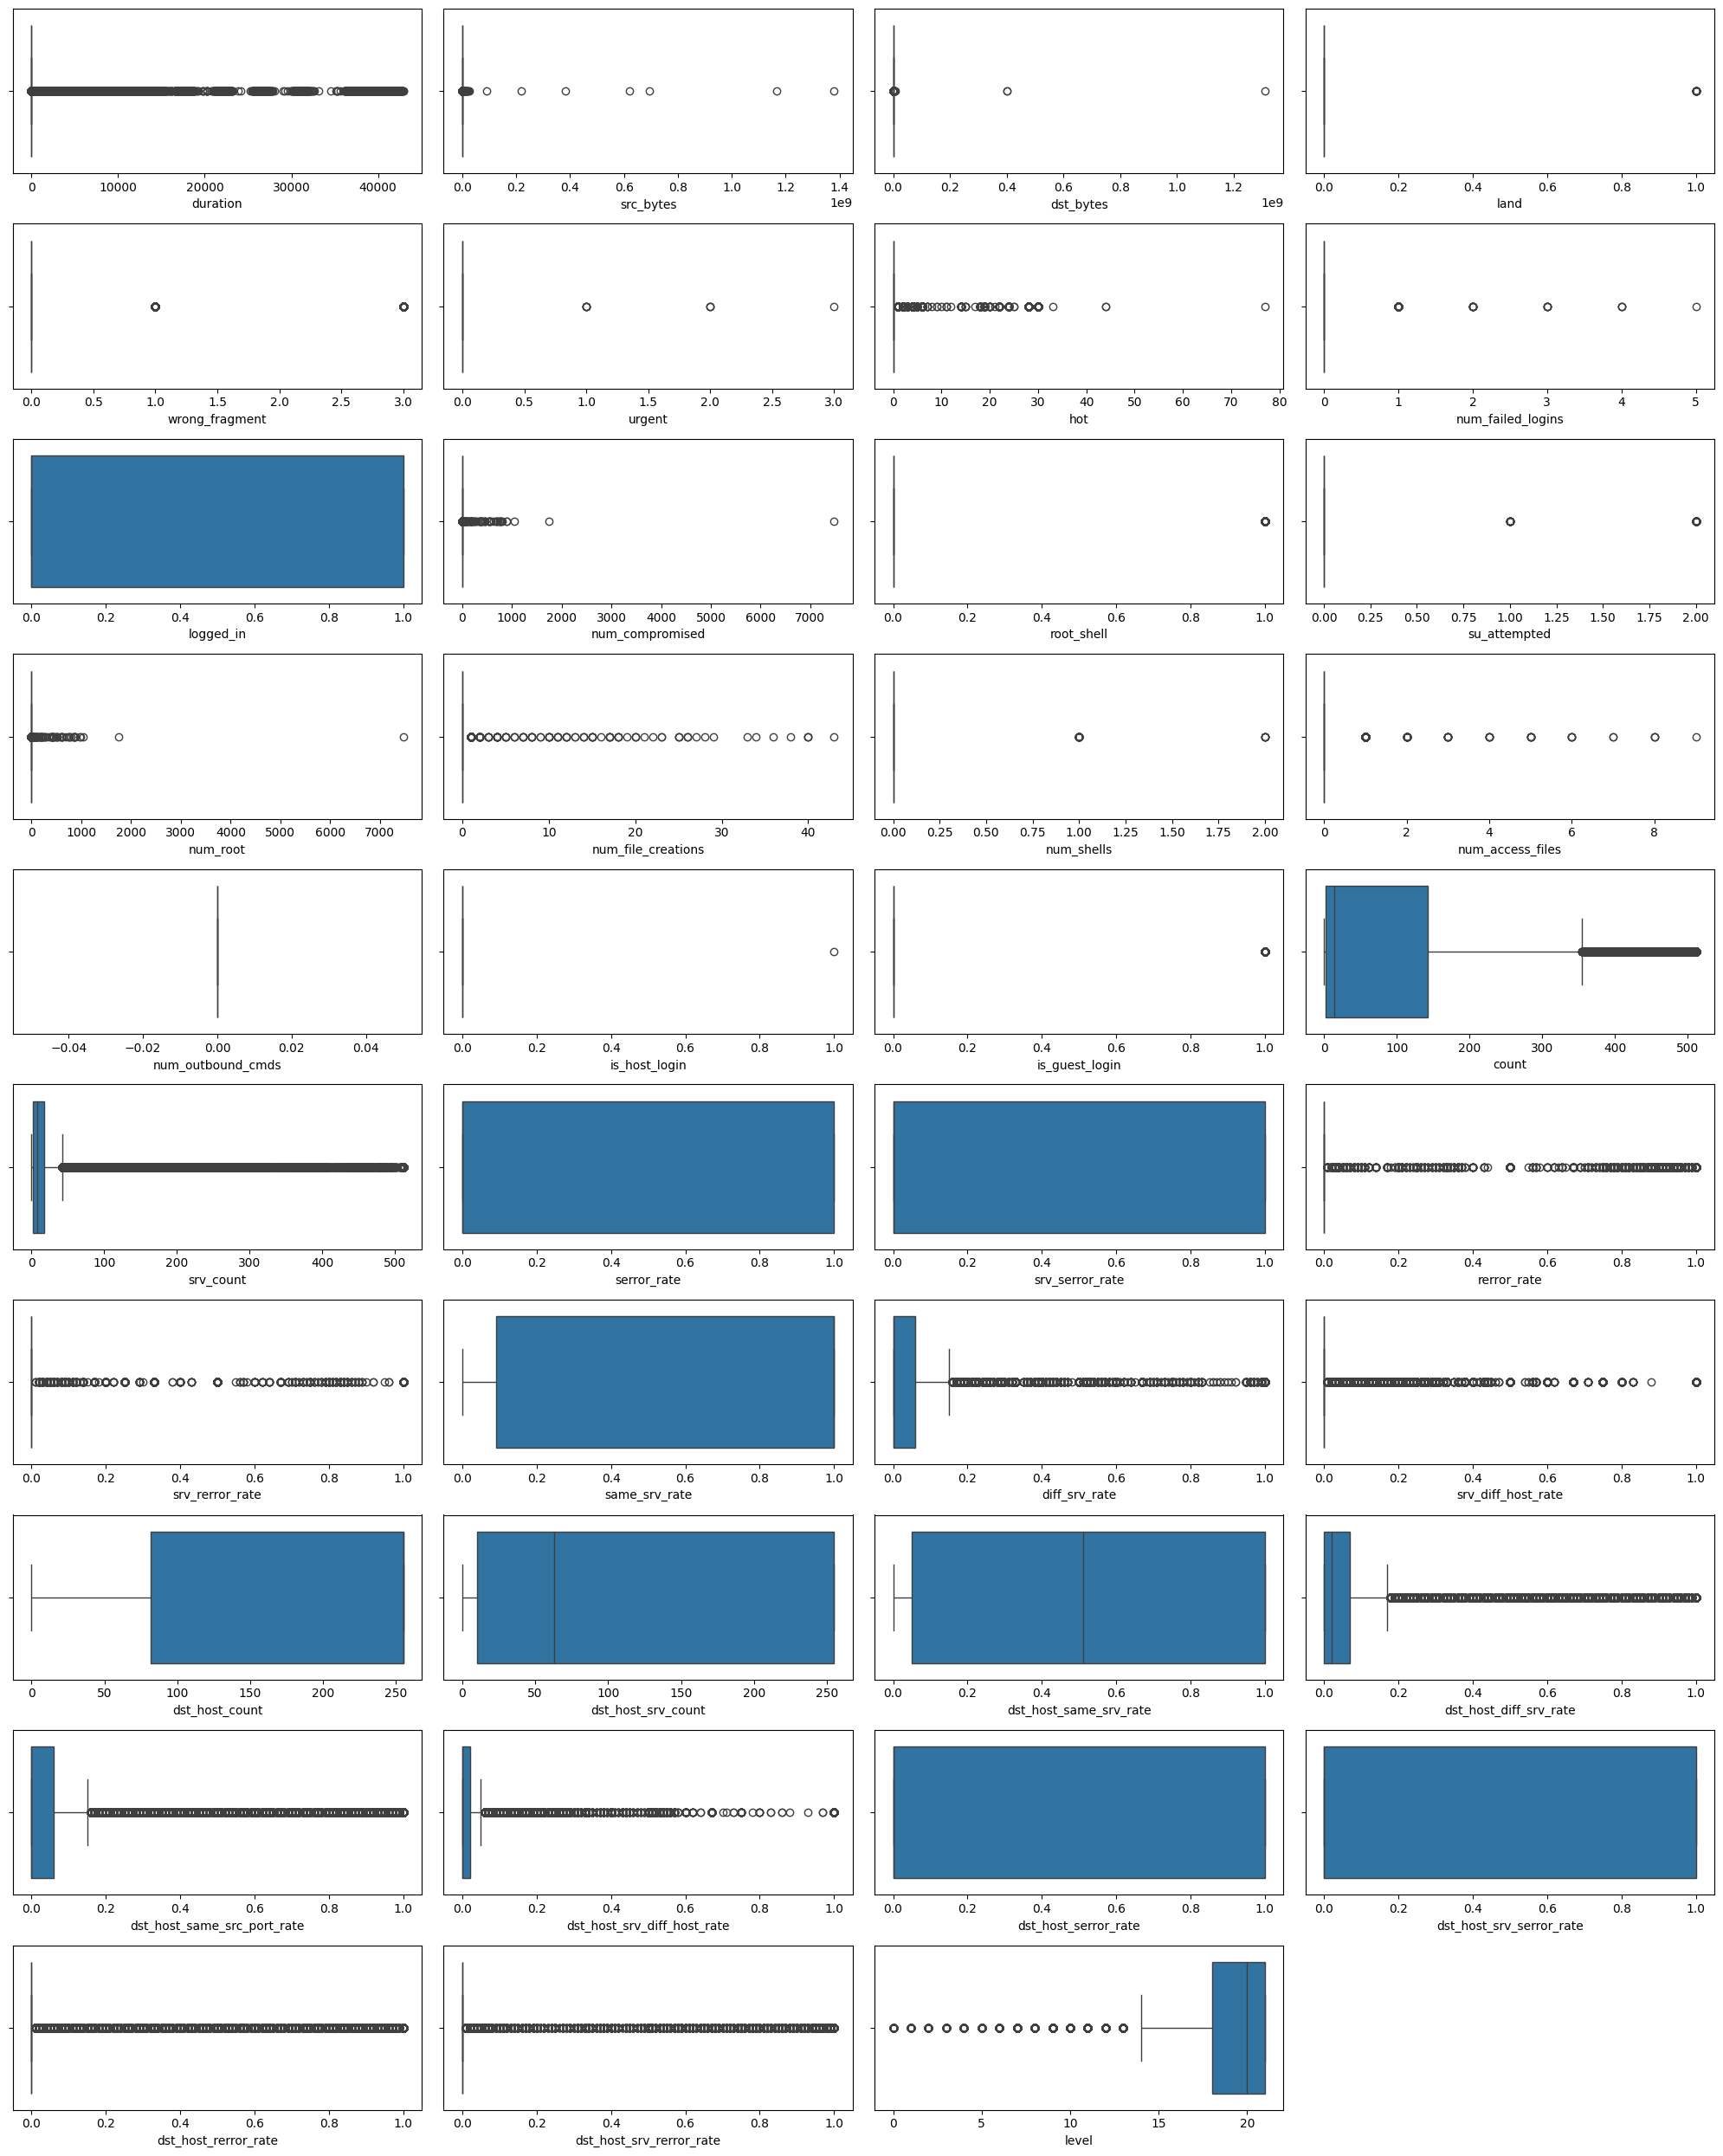

In [ ]:
num_col = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = train_data[num_col]

num_plots = len(num_col)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.boxplot(x = numerical_data[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Processing

### Outliers

In [ ]:
def replace_outliers_with_median(data, outliers_info):

    for column, info in outliers_info.items():
        outliers = info['outliers']
        non_outliers = data.loc[~outliers, column]

        # Sort non-outlier values and find the median
        sorted_non_outliers = non_outliers.sort_values()
        median_value = np.median(sorted_non_outliers)

        # Replace outliers with median
        data.loc[outliers, column] = median_value

    print("Done")

In [ ]:
replace_outliers_with_median(train_data, outliers_info)

Done


In order to maintain the model's ability to generalize real-life predictions, outliers values were only removed from the training data.

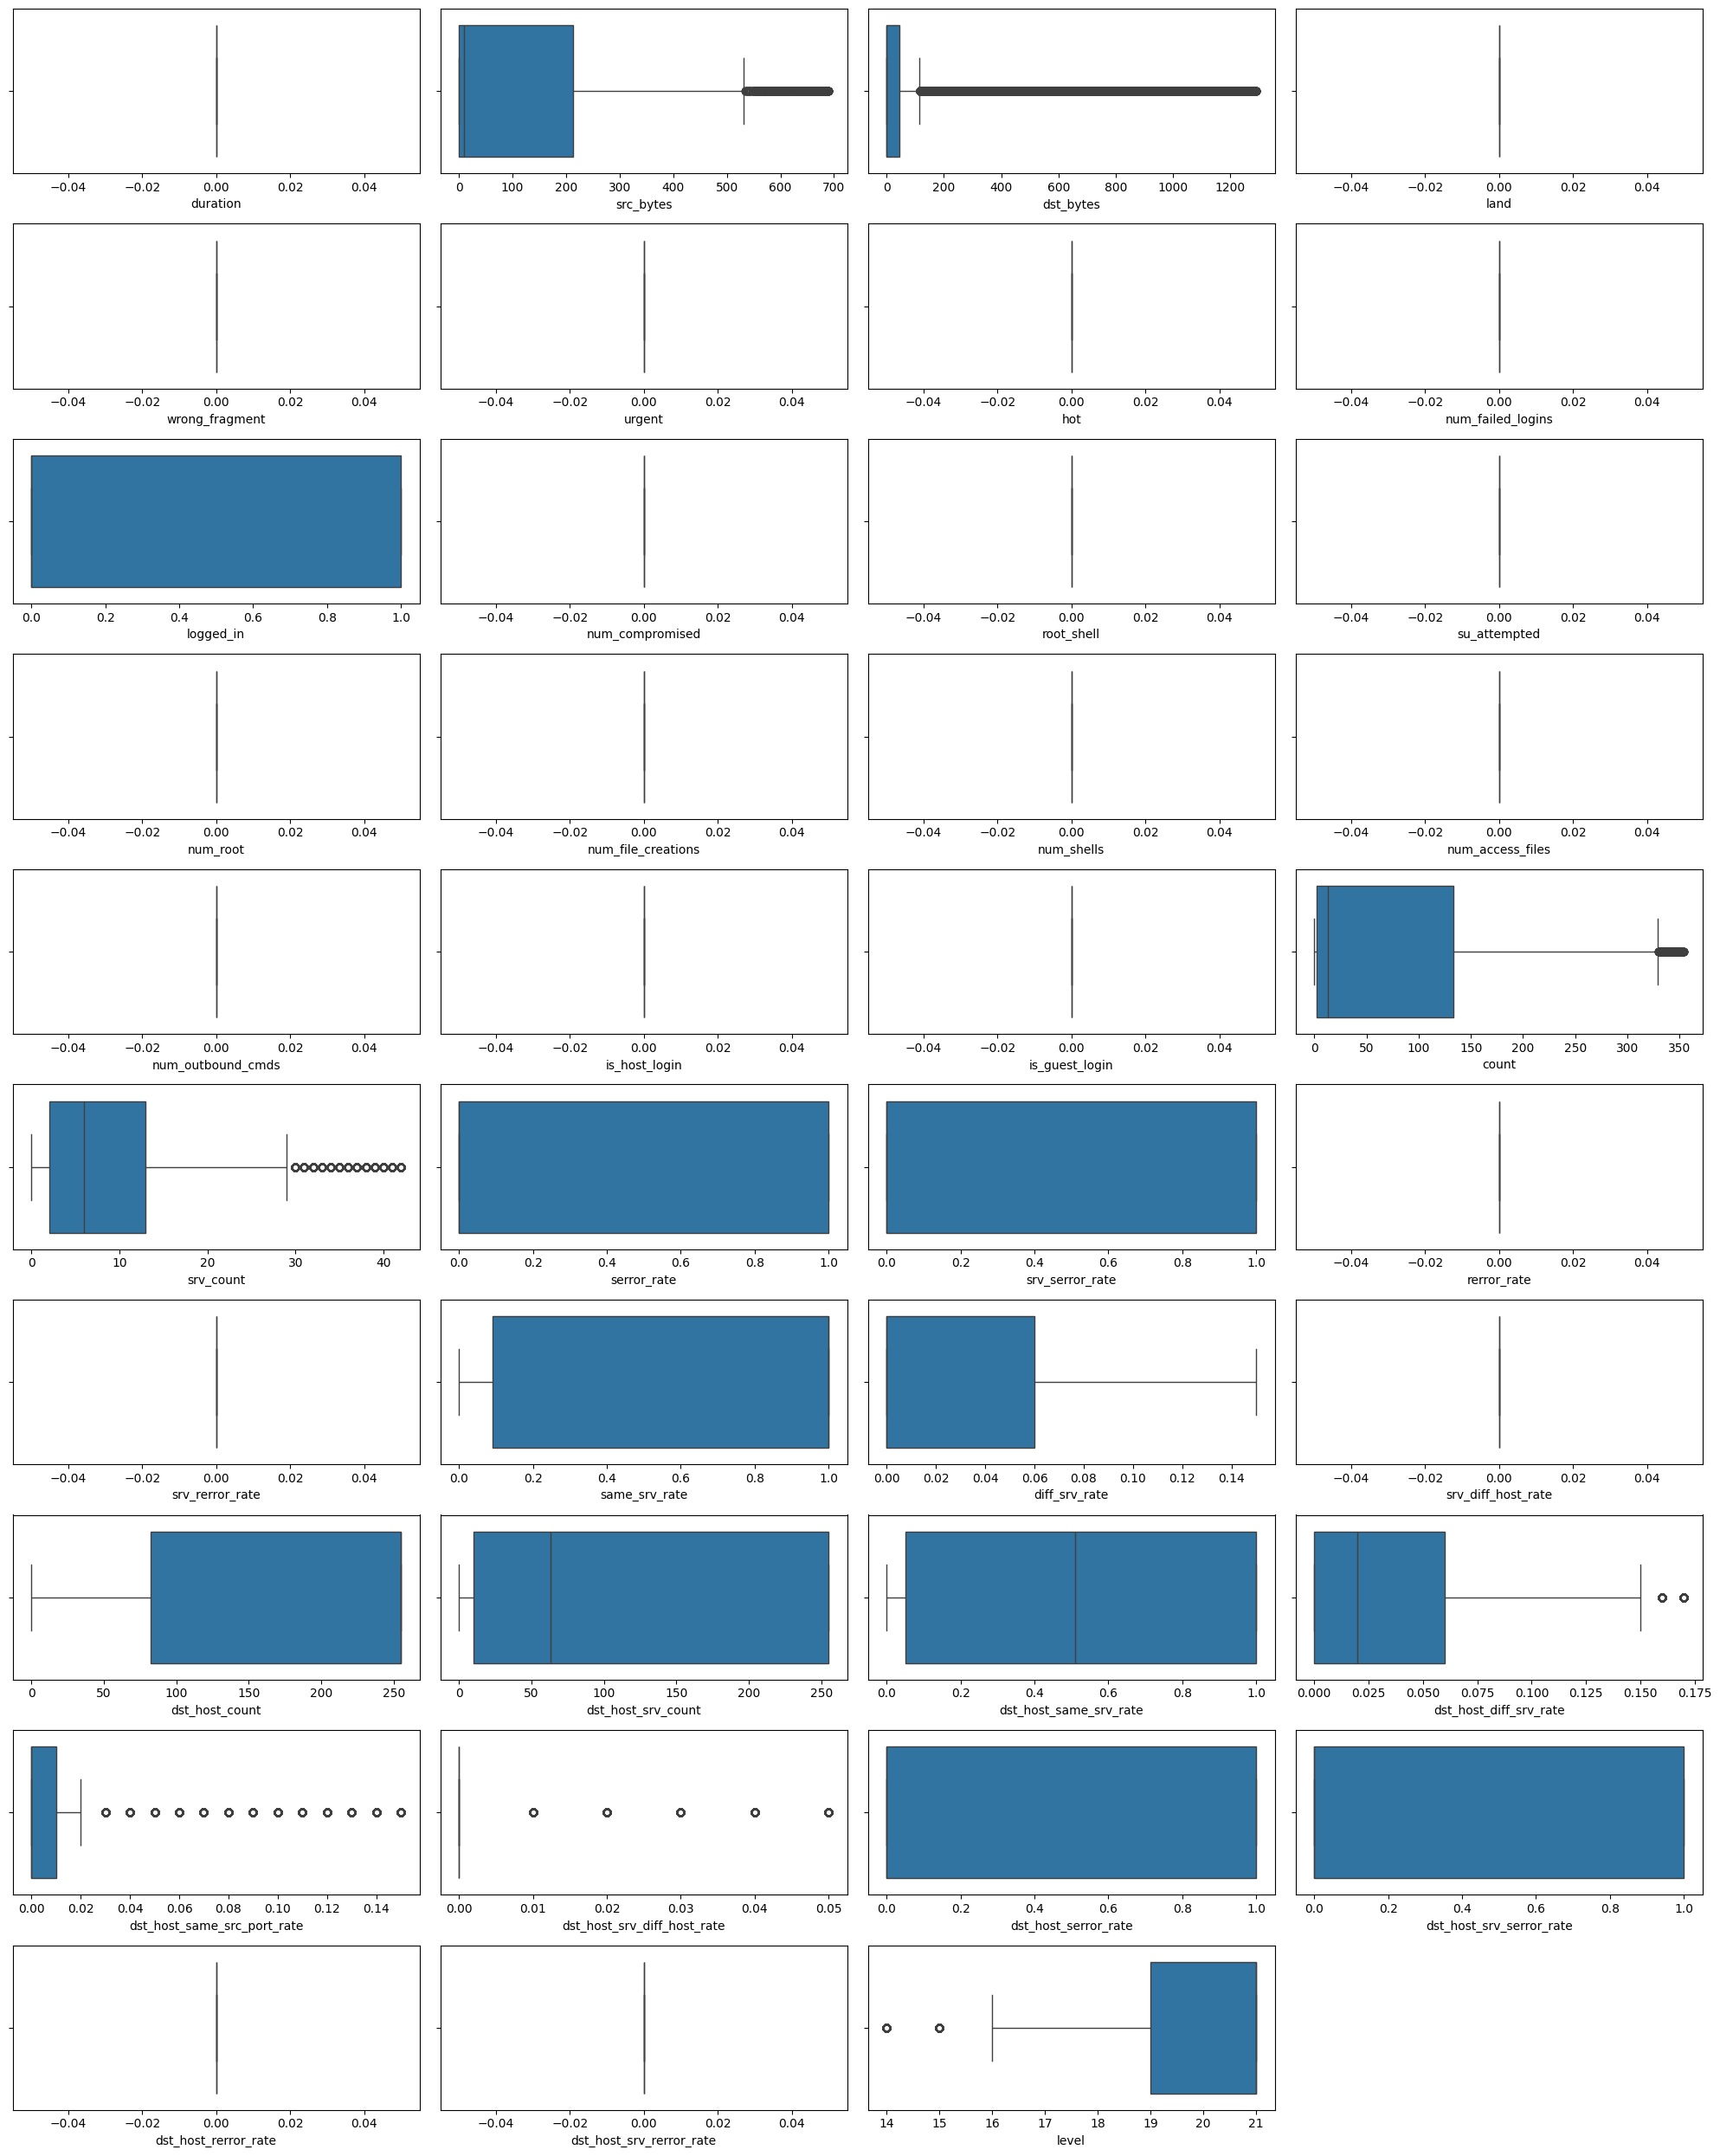

In [ ]:
num_col = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_data = train_data[num_col]

num_plots = len(num_col)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
    sns.boxplot(x = numerical_data[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### One-Hot Encoding

In [ ]:
def cat_col_manipulation(data):
  data['outcome'] = data.outcome.map(lambda x: 0 if x == 'normal' else 1)

  cat_col = data.select_dtypes(include=['object']).columns
  encoded_data = pd.get_dummies(data[cat_col], columns=cat_col, drop_first=True)
  encoded_data = encoded_data.astype(int)
  temp_data = data.drop(cat_col, axis=1)

  manipulated_data = pd.concat([temp_data, encoded_data], axis=1)

  return manipulated_data


In [ ]:
train_df = cat_col_manipulation(train_data)
test_df = cat_col_manipulation(test_data)

### Equalization of columns between the training and test datasets

In [ ]:
train_df.shape
test_df.shape

(22543, 115)

In [ ]:
columns_to_drop = [col for col in train_df.columns if col not in test_df.columns]
train_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
train_df.shape

(125972, 115)

## Data visulation

In [ ]:
def bar_plotter(df, col):
  counts = df[col].value_counts()

  plt.bar(counts.index, counts.values)

  plt.title(f'{col} Counts')
  plt.xlabel(col)
  plt.ylabel('Count')

  plt.xticks(counts.index)

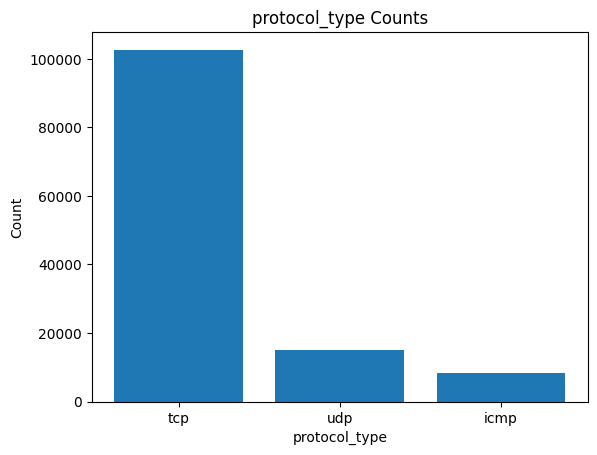

In [ ]:
bar_plotter(train_data, 'protocol_type')

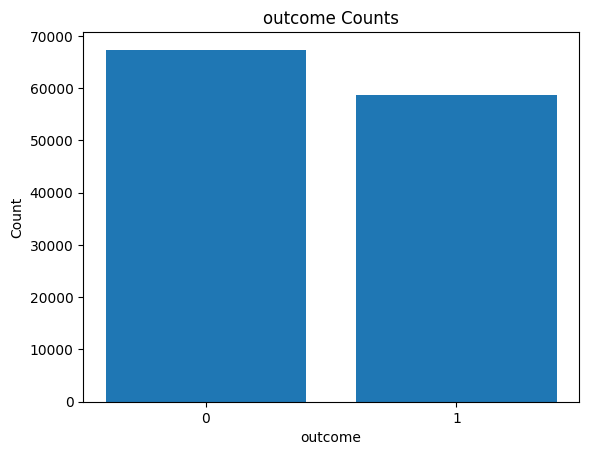

In [ ]:
bar_plotter(train_df, 'outcome')

Since there are many components, components with a correlation value greater than absolute 0.4 with our target value 'outcome' were visualized.

In [ ]:
correlation_matrix = train_df.corr()

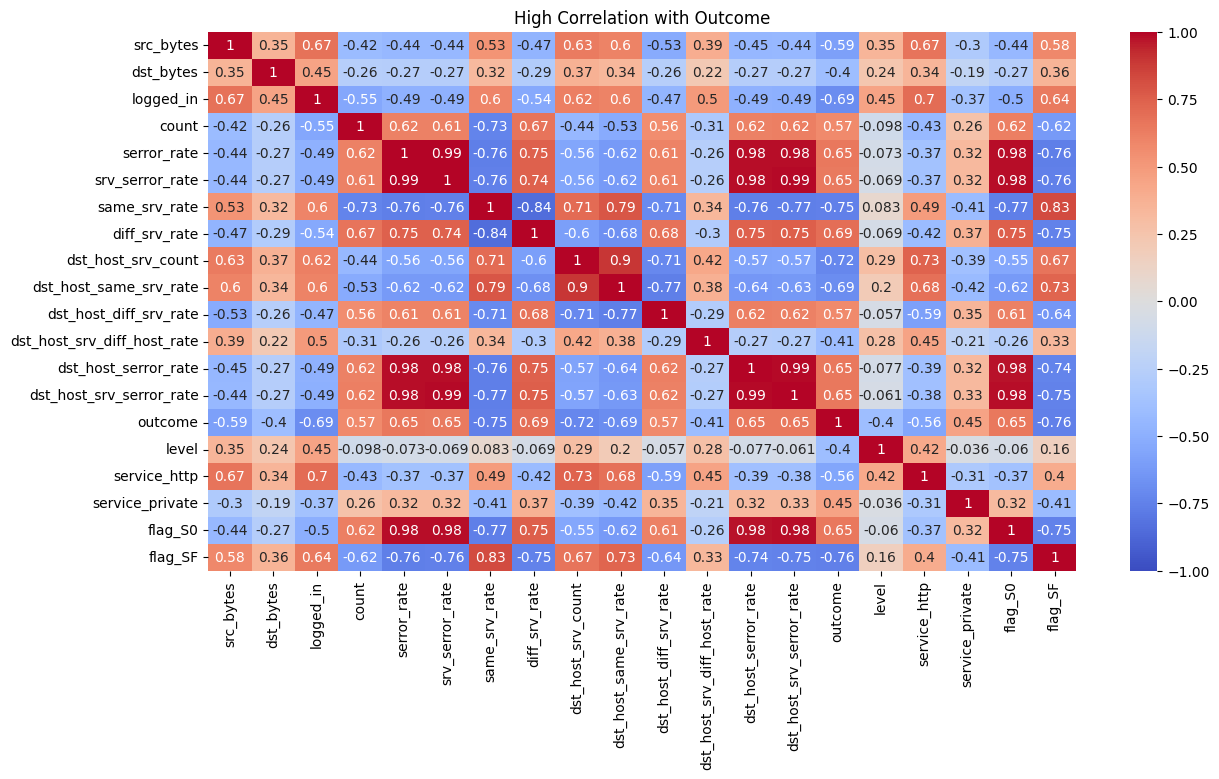

In [ ]:
selected_columns = correlation_matrix[abs(correlation_matrix['outcome']) >= 0.4].index.tolist()

plt.figure(figsize=(14, 7))
sns.heatmap(train_df[selected_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('High Correlation with Outcome')
plt.show()

## Scaling & PCA


In [ ]:
X_train = train_df.drop(['outcome', 'level'] , axis = 1).values
X_test = test_df.drop(['outcome', 'level'] , axis = 1).values

y_train = train_df['outcome'].values
y_test = test_df['outcome'].values

In [ ]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape


((125972, 113), (22543, 113), (125972,), (22543,))

Outlier values have been removed from the train data using the IQR method, however, outliers remain in the test data to ensure that models provide realistic results for real-life problems. Therefore, the use of RobustScaler() is preferred.

In [ ]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

PCA has only been explored. We understand that only a few parameters are sufficient to explain the data, but when the n_component value is chosen low, it results in a decrease in the predictive abilities of the models.

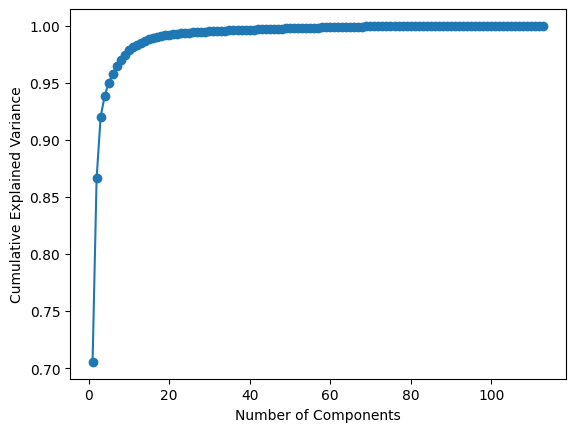

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Model Selection

In [ ]:
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test, cv=10, metrics=None):

    if metrics is None:
        metrics = ['accuracy', 'precision', 'recall', 'f1']

    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    results = {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'cv_scores': cv_scores
    }

    return results

In [ ]:
def model_evaluation_plotter(model_name, model, X_test, y_test, figsize=(20, 5)):
    if model_name is None:
      model_name = 'model'

    y_scores = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=figsize)

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=sns.cubehelix_palette(as_cmap=True))
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Prediction', fontsize=13)
    plt.title(f"{model_name} Confusion Matrix")

    # ROC curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc='lower right')

    # Precision - Recall
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{model_name} Precision-Recall Curve: AP={0:0.2f}".format(average_precision))

    plt.show()

### LinearSVC

In [ ]:
from sklearn import svm
lin_svm =svm.LinearSVC()
train_and_evaluate_model('LinearSVC', lin_svm, X_train_scaled, X_test_scaled, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

{'model': 'LinearSVC',
 'accuracy': 0.7031894601428381,
 'precision': 0.907390208305692,
 'recall': 0.532964463840399,
 'f1': 0.671510628896853,
 'cv_scores': array([0.97142404, 0.96832831, 0.96919902, 0.96935778, 0.96888148,
        0.97070731, 0.97070731, 0.96999286, 0.97245376, 0.96872271])}

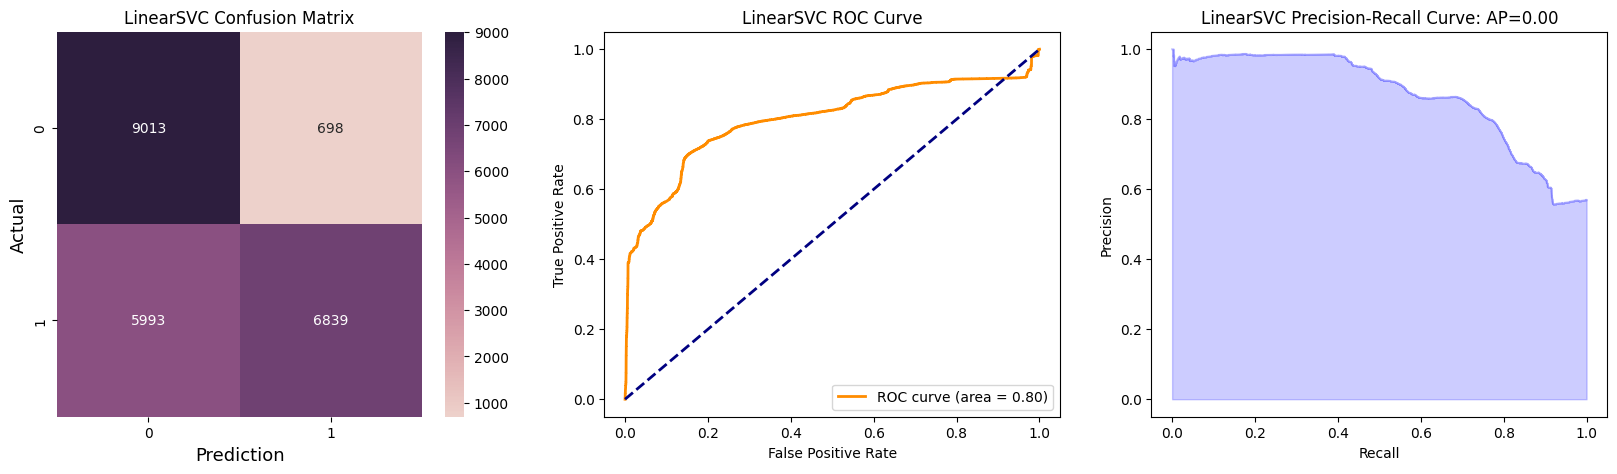

In [ ]:
def Linear_SVM_model_evaluation_plotter(model_name, model, X_test, y_test, figsize=(20, 5)):
    if model_name is None:
      model_name = 'model'

    # Tahminlerin skorlarını al
    y_scores = model.decision_function(X_test)

    plt.figure(figsize=figsize)

    # Confusion Matrix
    plt.subplot(1, 3, 1)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=sns.cubehelix_palette(as_cmap=True))
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Prediction', fontsize=13)
    plt.title(f"{model_name} Confusion Matrix")

    # ROC curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc='lower right')

    # Precision - Recall
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{model_name} Precision-Recall Curve: AP={0:0.2f}".format(average_precision))

    plt.show()

Linear_SVM_model_evaluation_plotter('LinearSVC', lin_svm, X_test_scaled, y_test)


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf_result = train_and_evaluate_model('Random Forest', rf, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
rf_result

{'model': 'Random Forest',
 'accuracy': 0.746440136627778,
 'precision': 0.9685277850934949,
 'recall': 0.573176433915212,
 'f1': 0.7201605796533829,
 'cv_scores': array([0.99809494, 0.99825369, 0.9984917 , 0.99857109, 0.99865047,
        0.9984917 , 0.99825355, 0.9984917 , 0.99841232, 0.9984917 ])}

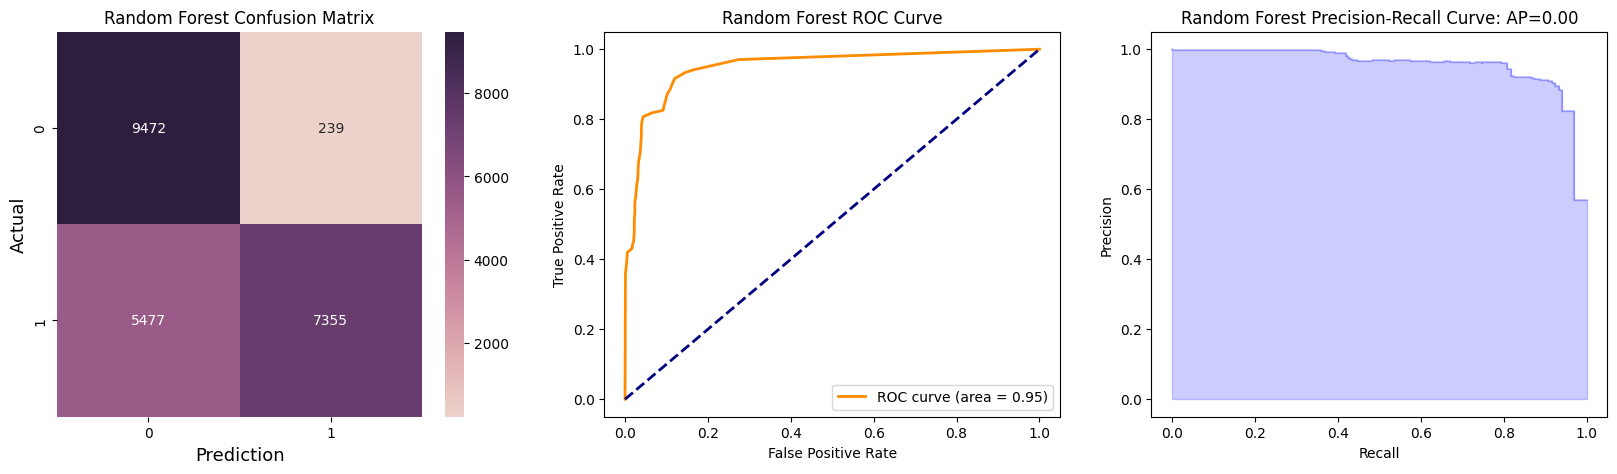

In [ ]:
model_evaluation_plotter('Random Forest', rf, X_test_scaled, y_test)

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
train_and_evaluate_model('DecisionTreeClassifier ', clf, X_train_scaled, X_test_scaled, y_train, y_test)

{'model': 'DecisionTreeClassifier ',
 'accuracy': 0.774608525928226,
 'precision': 0.8936515997968512,
 'recall': 0.6856296758104738,
 'f1': 0.7759403801208273,
 'cv_scores': array([0.96689951, 0.96507382, 0.9653092 , 0.9648329 , 0.96649996,
        0.96943717, 0.96848456, 0.96872271, 0.96800826, 0.96745257])}

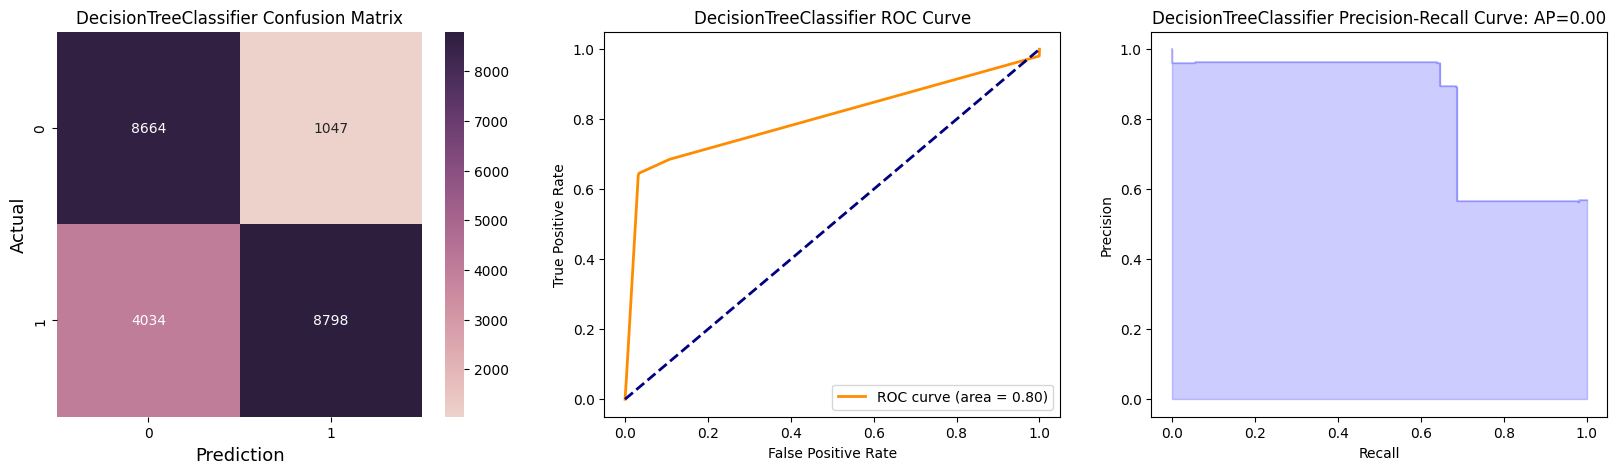

In [ ]:
model_evaluation_plotter('DecisionTreeClassifier', clf, X_test_scaled, y_test)


### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
train_and_evaluate_model('KNeighborsClassifier ', knn, X_train_scaled, X_test_scaled, y_train, y_test)

{'model': 'KNeighborsClassifier ',
 'accuracy': 0.7154327285631904,
 'precision': 0.893729291937661,
 'recall': 0.5675654613466334,
 'f1': 0.6942471760163959,
 'cv_scores': array([0.99658676, 0.99666614, 0.99571327, 0.99658649, 0.9965071 ,
        0.99626895, 0.99682464, 0.99690402, 0.9965071 , 0.9965071 ])}

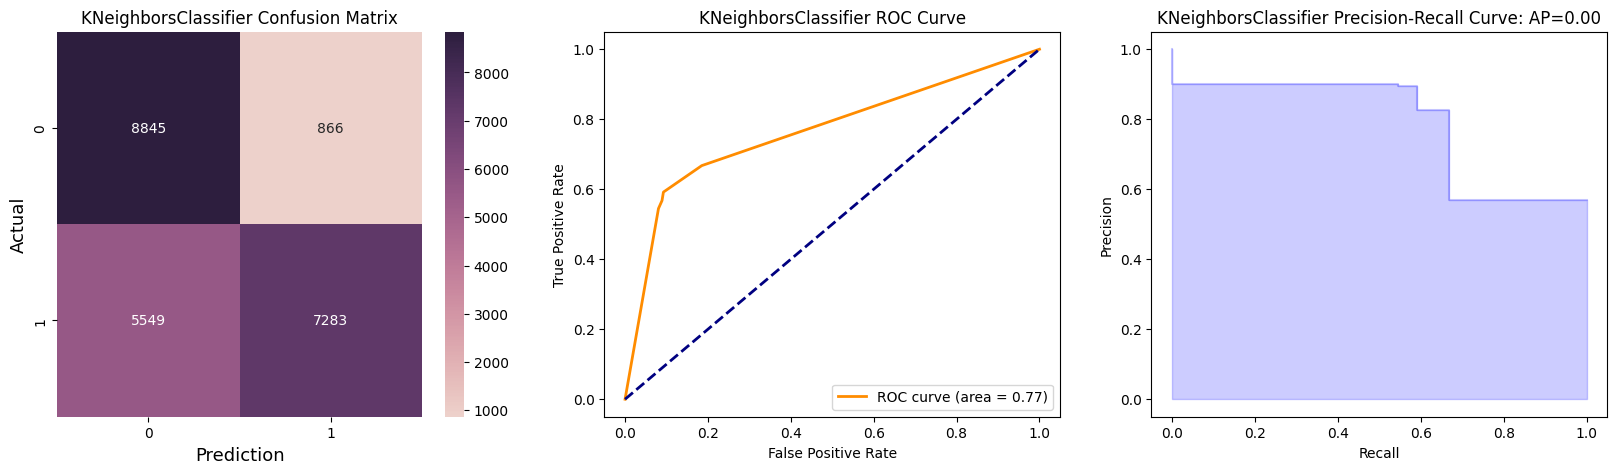

In [ ]:
model_evaluation_plotter('KNeighborsClassifier', knn, X_test_scaled, y_test)


### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

XGB_reg = XGBRegressor()
XGB_reg.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGB_reg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R²):", r2)

Mean Squared Error (MSE): 0.2075470969538606
Mean Absolute Error (MAE): 0.24324111281075023
R-squared Score (R²): 0.15358806204355857


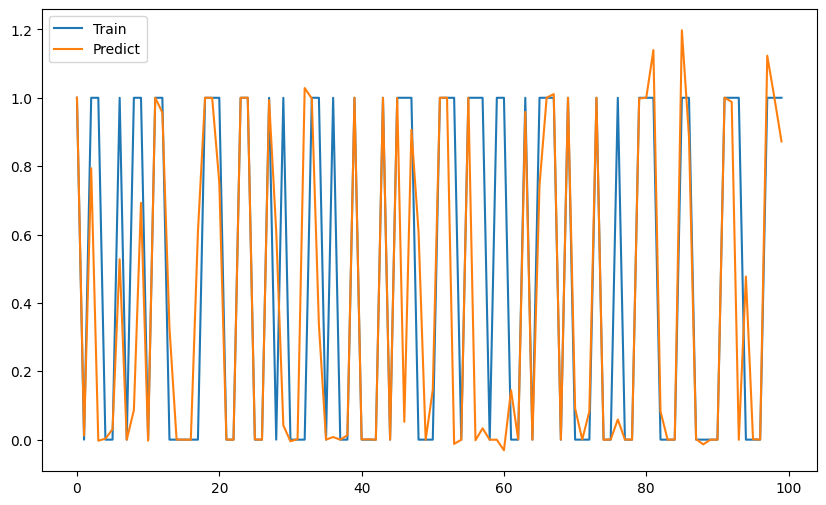

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Train')
plt.plot(y_pred[:100], label='Predict')
plt.legend()
plt.show()


### Logistic Reg

In [ ]:
LR = LogisticRegression()
train_and_evaluate_model('Logistic Regression', LR, X_train_scaled, X_test_scaled, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'model': 'Logistic Regression',
 'accuracy': 0.7089118573393071,
 'precision': 0.9114173228346457,
 'recall': 0.5412250623441397,
 'f1': 0.6791511832583611,
 'cv_scores': array([0.97007462, 0.9680108 , 0.96832579, 0.96856394, 0.96808764,
        0.96967532, 0.96943717, 0.96745257, 0.97046916, 0.9677701 ])}

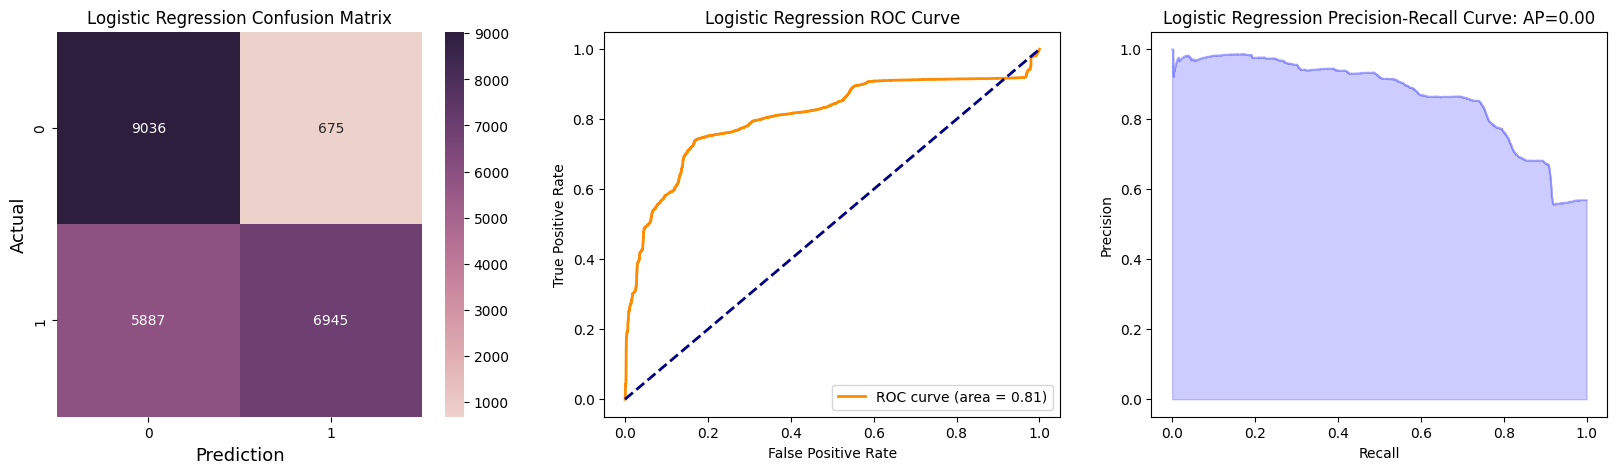

In [ ]:
model_evaluation_plotter('Logistic Regression', LR, X_test_scaled, y_test)

### MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 500, 250)).fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp.predict(X_test_scaled)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision': {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.7473273299915717
precision': 0.9590838908903757
recall: 0.5808915211970075
f1: 0.7235488254707825


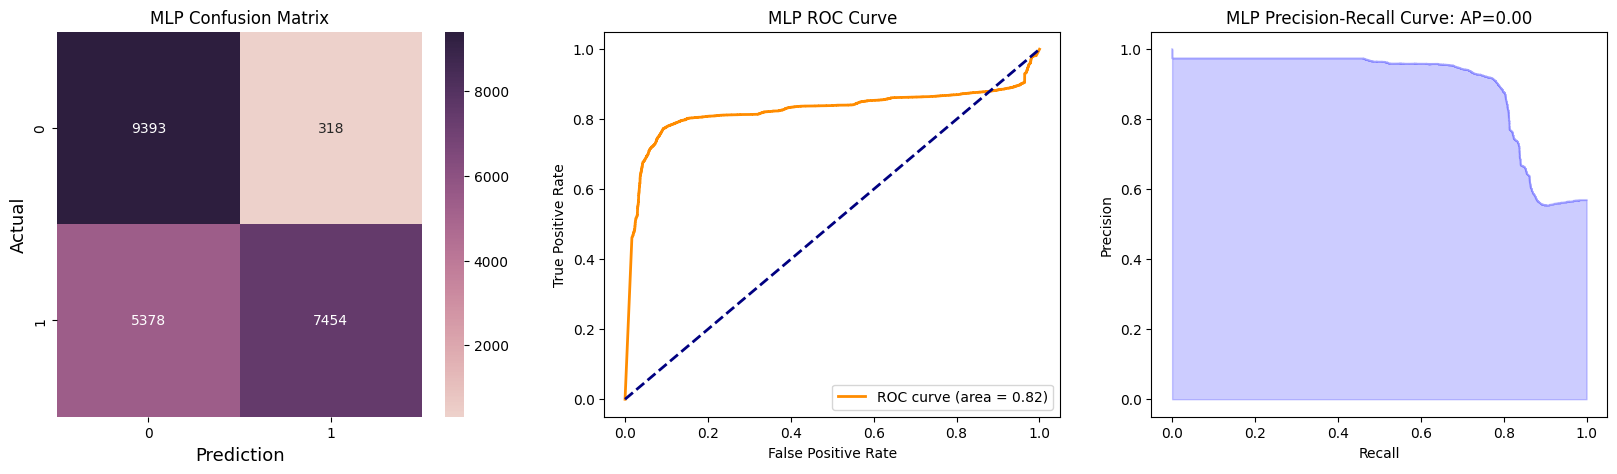

In [ ]:
model_evaluation_plotter("MLP", mlp, X_test_scaled, y_test)

## Model Tuning & Final Results
When evaluating the models, it seems that the results are close to each other, but the Random Forest Classifier and Decision Tree Classifier models have been more successful. To make a decision between the two, let's proceed with the hyperparameter tuning process.

In [ ]:
def hyper_parameter(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_dt_classifier = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_params

#### Random Forest Classifier

In [ ]:
rf_classifier_tune = RandomForestClassifier()

In [ ]:
rf_param_grid = {
    'n_estimators': [10, 50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 10, 30],
}

In [ ]:
rf_best_params = hyper_parameter(rf_classifier_tune, rf_param_grid)
rf_best_params

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 50}

In [ ]:
rf_best_model = RandomForestClassifier(**rf_best_params)
train_and_evaluate_model('Best RandomForestClassifier', rf_best_model, X_train_scaled, X_test_scaled, y_train, y_test)

{'model': 'Best RandomForestClassifier',
 'accuracy': 0.7477265670052788,
 'precision': 0.9704991439483736,
 'recall': 0.5742674563591023,
 'f1': 0.7215667074663403,
 'cv_scores': array([0.99833307, 0.99809494, 0.99841232, 0.99872986, 0.9984917 ,
        0.99841232, 0.99777725, 0.99865047, 0.9984917 , 0.99833294])}

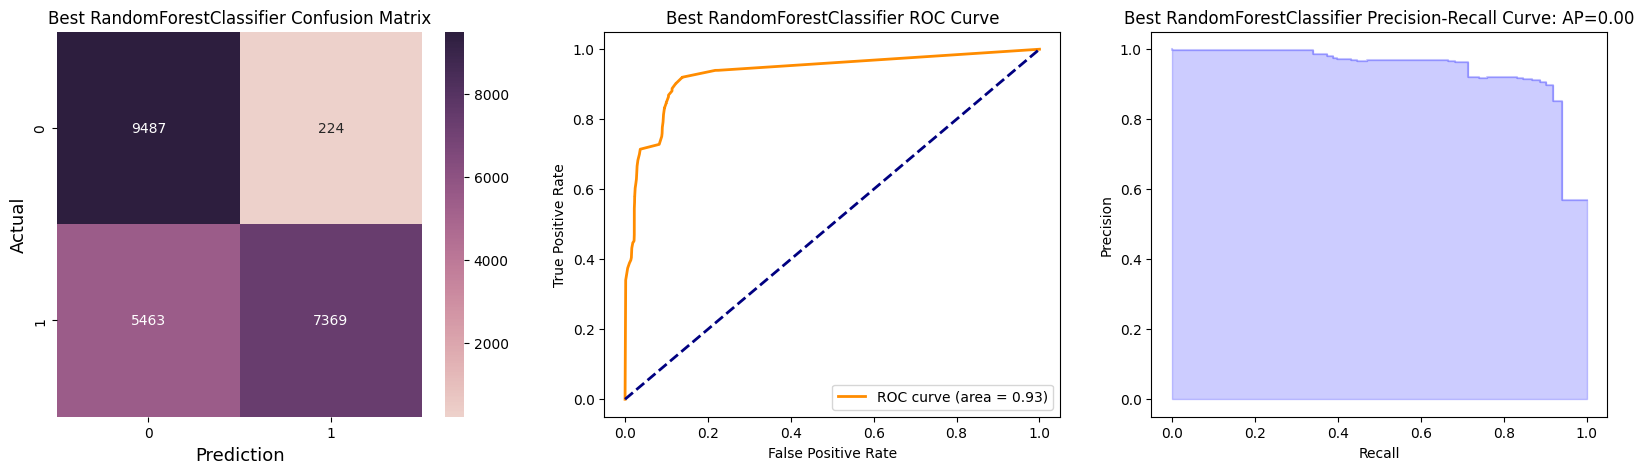

In [ ]:
model_evaluation_plotter('Best RandomForestClassifier', rf_best_model, X_test_scaled, y_test)

#### Decision Tree Classifier

In [ ]:
dt_classifier_tune = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20 ],
}

In [ ]:
dt_best_params = hyper_parameter(dt_classifier_tune, dt_param_grid)
dt_best_params

{'criterion': 'gini', 'max_depth': None}

In [ ]:
dt_best_model = DecisionTreeClassifier(**dt_best_params)
train_and_evaluate_model('Best DecisionTreeClassifier', dt_best_model, X_train_scaled, X_test_scaled, y_train, y_test)

{'model': 'Best DecisionTreeClassifier',
 'accuracy': 0.7557556669476112,
 'precision': 0.9074527252502781,
 'recall': 0.6357543640897756,
 'f1': 0.7476858216478783,
 'cv_scores': array([0.99777742, 0.99769805, 0.99730094, 0.9984917 , 0.99825355,
        0.99738033, 0.99761848, 0.99817417, 0.99745971, 0.99777725])}

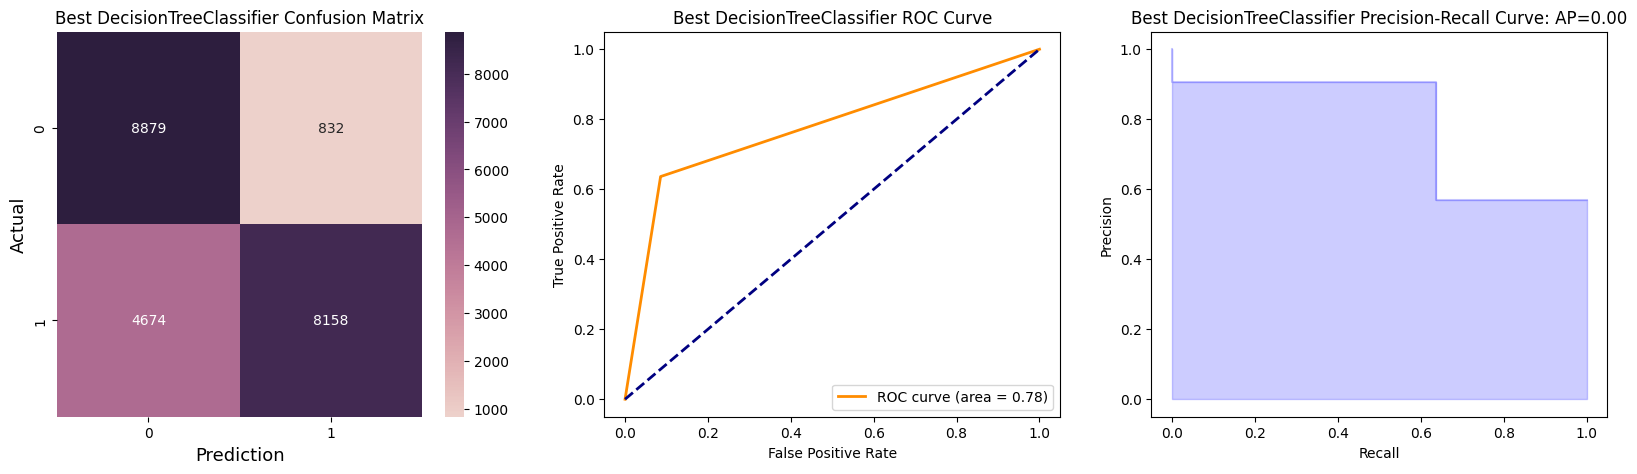

In [ ]:
model_evaluation_plotter('Best DecisionTreeClassifier', dt_best_model, X_test_scaled, y_test)

Veri seti dengeli olduğu için, sınıflandırma performansını değerlendirmek için F1 skoru genellikle daha iyi bir ölçü olur. Çünkü F1 skoru, kesinlik (precision) ve duyarlılık (recall) değerlerinin harmonik ortalamasını temsil eder ve dengeli sınıflandırma problemlerinde daha güvenilir bir performans metriği olarak kabul edilir. Decision Tree'nin confusion matrisi daha iyi olduğundan ve ROC değeri de fena olmadığı için Decision Tree'yi tercih edeceğim.

Modelin en önemli feature'ları

In [ ]:
feature_names =train_df.columns

In [ ]:
feature_importances = dt_best_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_10_features = sorted_indices[:10]
top_feature_names = [feature_names[i] for i in top_10_features]


In [ ]:
top_feature_names

['src_bytes',
 'service_gopher',
 'service_echo',
 'dst_host_same_srv_rate',
 'dst_bytes',
 'service_pop_3',
 'service_domain_u',
 'srv_count',
 'dst_host_srv_count',
 'count']

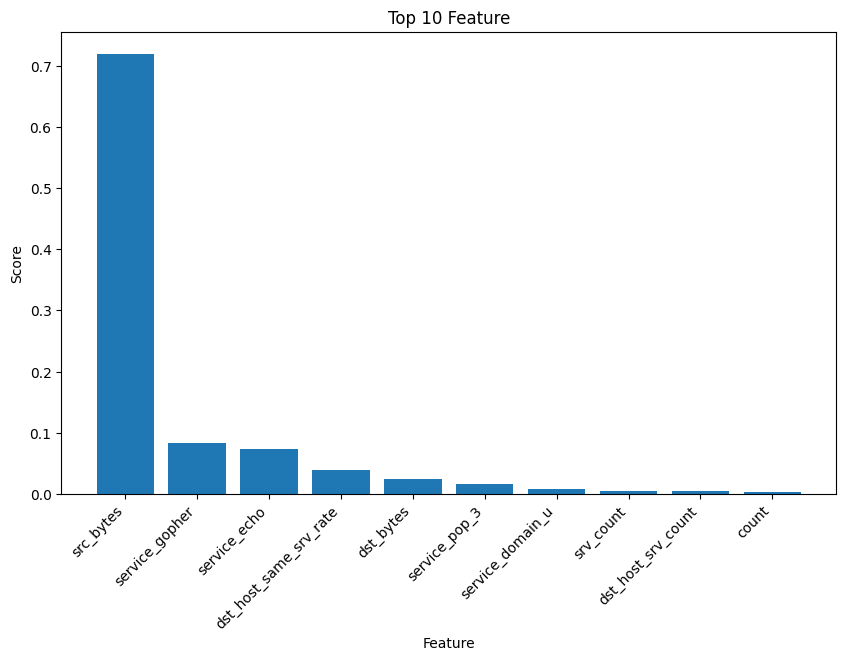

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_features)), feature_importances[top_10_features], tick_label=top_feature_names)
plt.title('Top 10 Feature')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

## Model Save

In [ ]:
import joblib

filename = 'anomaly_detection_model_DTC.joblib'
joblib.dump(dt_best_model, filename)

['anomaly_detection_model_DTC.joblib']

In [ ]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']